Attention mechanism 적용

# 라이브러리 불러오기

In [1]:
import tensorflow as tf     # 텐서플로우를 tf 약칭으로 불러온다.
# tensorflow.keras.layers() -> tf.keras.layer()

from tensorflow import keras
from tensorflow.keras.layers import *
# tensorflow.keras.layers() -> keras.layers()

from tensorflow.keras import layers
# keras.layers() -> layers()

#As a result, tensorflow.keras.layers() -> layers()

# 그래프 그리는 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 프레임, 데이터 처리 라이브러리
import pandas as pd

# 수식 계산, 행렬 처리에 유능함
import numpy as np

# 학습 및 평가 라이브러리
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import pickle
import joblib

# 통계 라이브러리 (정규분포 등)
from scipy.stats import uniform

# 시간 라이브러리
import time

# 현재 시간 입력
from datetime import date
today = date.today()

import os

Font_Title = {"fontsize" : 24}
Font_Xlabel = {"fontsize" : 14}
Font_Ylabel = {"fontsize" : 14}

In [2]:
def CreateFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)


def LoadFile(file_path, file_name, file_type='csv', index = False):
    if file_type == 'csv':
        file_load = pd.read_csv("{}/{}.csv".format(file_path, file_name), # encoding='euc-kr'
                                header = 0) 
        print(f"Dataset is loaded from: {file_path}/{file_name}.csv")
        print(f"Dataset shape: {file_load.shape}") 

    elif file_type == 'pkl':
        file_load = joblib.load(file_path + "/" + file_name + ".pkl")
        print("Scaler is loaded from: {}/{}.pkl".format(file_path, file_name))

    elif file_type == 'model':
        file_load = keras.models.load_model(f"{file_path}/{file_name}")
        print(f"Model is loaded from: {file_path}/{file_name}")
        
    return file_load


def SaveFile(file_save, file_path, file_name, file_type='csv'):
    if file_type == 'csv':
        file_save.to_csv(file_path + "/" + file_name +".csv", index = False)
        print("Data is saved to: {}/{}.csv".format(file_path, file_name))
        print("Data shape: {}".format(file_save.shape))

    elif file_type == 'pkl':
        joblib.dump(file_save, file_path + "/" + file_name + ".pkl")
        print("Scaler is saved to: {}/{}.pkl".format(file_path, file_name))


def FileExist(file_path, file_name, file_type='csv'):
    if file_type == "csv":
        IsTrue = os.path.exists(file_path + "/" + file_name + ".csv")

    elif file_type == "pkl":
        IsTrue = os.path.exists(file_path + "/" + file_name + ".pkl")

    elif file_type == 'model':
        IsTrue = os.path.exists(f"{file_path}/{file_name}")

    return IsTrue

# 드라이브 마운트

In [3]:
#4/1AY0e-g5Yzt3fzAVQ_KxWbJ4PNu9zdCMWgLVRlMjXTgmQqaWSIwfguwTZXBE

from google.colab import drive
drive.mount('/content/gdrive')

Path_Project = "/content/gdrive/My Drive/Colab Notebooks/DC"
Path_Data = Path_Project + "/Data"
Path_Modeling = Path_Project + "/Modeling"
Path_Graph = Path_Project + "/Graph"

CreateFolder(Path_Data)
CreateFolder(Path_Modeling)
CreateFolder(Path_Graph)

Mounted at /content/gdrive


# 모델링 변수 선정

In [4]:
Var_Mani = ["FT-3061-2", "FT-3061-3", "FT-3061-4", "FT-3062-1"]
              #FD RATE     #STM RATE    #RFLX RATE  #BTM FLOWRATE 
Var_Stat = ["TT-3061-1", "PT-3061-2", "TT-3061-2", "LT-3062-1", "TT-3061-4", "TT-3061-6", "PT-3061-3"]
             #FD TEMP      #TOP P      #TOP TEMP   #RFLX LVL     #MDL2 TEMP   #BTM TEMP    #BTM P

Var_Sens = ["TT-3061-3", "TT-3061-5", "LT-3061-2"]
              #MDL TEMP   #MDL-H TEMP  #LVL DGR  
Var_Qual = ["Acetoin"]              #Quality variables


Var_Total = Var_Mani + Var_Stat + Var_Sens
Var_Proc = Var_Mani + Var_Sens     #Process variables  

Num_Mani = len(Var_Mani)
# Num_Stat = len(Var_Stat)
Num_Sens = len(Var_Sens)

Num_Proc = len(Var_Proc)

Random_State = 10

In [5]:
Patience = 40
Early_stopping_cb = keras.callbacks.EarlyStopping(patience=Patience, restore_best_weights= True, monitor='val_loss')

Size_batch = 128

Num_layers = 1
Num_neurons = 200

# 데이터 불러오기

In [6]:
Name_Raw_Plant = "BDO Data Operation October"
Num_Cluster_Plant = 2
Min_Series = 500
len_target_data_list = 14

In [7]:
# EWA for lists
Alpha = 0.9
Name_Data_EWA = f"{Name_Raw_Plant} RS {Random_State} Cluster {Num_Cluster_Plant} Series {Min_Series} EWA {Alpha}"
# Name_Data_EWA = "BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9"

Update = False
data_ewa_list = []
if not FileExist(Path_Data, Name_Data_EWA, 'model') or Update:
    CreateFolder(f"{Path_Data}/{Name_Data_EWA}")

    for i, data in enumerate(target_data_list):
        data_ewa = EWA(data, Alpha)
        data_ewa_list.append(data_ewa)
        SaveFile(data_ewa, f"{Path_Data}/{Name_Data_EWA}", f"Series {i+1}", 'csv')
else:
    for i in range(len_target_data_list):
        data_ewa = LoadFile(f"{Path_Data}/{Name_Data_EWA}", f"Series {i+1}", 'csv')
        data_ewa_list.append(data_ewa)

Data_Plant_On_EWA = data_ewa_list

Dataset is loaded from: /content/gdrive/My Drive/Colab Notebooks/DC/Data/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9/Series 1.csv
Dataset shape: (843, 14)
Dataset is loaded from: /content/gdrive/My Drive/Colab Notebooks/DC/Data/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9/Series 2.csv
Dataset shape: (1959, 14)
Dataset is loaded from: /content/gdrive/My Drive/Colab Notebooks/DC/Data/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9/Series 3.csv
Dataset shape: (575, 14)
Dataset is loaded from: /content/gdrive/My Drive/Colab Notebooks/DC/Data/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9/Series 4.csv
Dataset shape: (569, 14)
Dataset is loaded from: /content/gdrive/My Drive/Colab Notebooks/DC/Data/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9/Series 5.csv
Dataset shape: (863, 14)
Dataset is loaded from: /content/gdrive/My Drive/Colab Notebooks/DC/Data/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9

# DATA PREPARATION

## 시리즈 데이터 생성

In [8]:
def MSMOSeriesData(data_history, data_future, index_start, index_end, history_length, future_length, step):
    data = []
    labels = []

    index_start = index_start + history_length
    if index_end is None:
        index_end = len(data_history) - future_length

    for i in range(index_start, index_end):
        indices_x = range(i-history_length, i, step)
        data.append(data_history[indices_x])

        if future_length == 1:
            labels.append(data_future[i])
        else:
            labels.append(data_future[i : i+future_length : step])

    return np.array(data), np.array(labels)

def MakeSeries(data_target, Len_Hist, Len_Futr, Step):
    for i, data_sc in enumerate(data_target):
        history_data_sc, future_data_sc = MSMOSeriesData(data_sc[Var_Proc].values, data_sc[Var_Sens].values,
                                                        0, None,
                                                        Len_Hist, Len_Futr, Step)
        if not i:
            Hist_sc = history_data_sc
            Futr_sc = future_data_sc
            
        else:
            Hist_sc = np.concatenate([Hist_sc, history_data_sc], axis=0)
            Futr_sc = np.concatenate([Futr_sc, future_data_sc], axis=0)
    
    return Hist_sc, Futr_sc

In [9]:
Step = 1
Len_Hist = 60
Len_Futr = 20

In [10]:
Hist_Proc, Futr_Sens = MakeSeries(Data_Plant_On_EWA, Len_Hist, Len_Futr, Step)

print ("(the Number of Dataset, Length of History, Features of History)",
    f"Total History: {Hist_Proc.shape}",
    f"Total Future: {Futr_Sens.shape}",
    sep='\n')

(the Number of Dataset, Length of History, Features of History)
Total History: (13834, 60, 7)
Total Future: (13834, 20, 3)


## Train/Test split

In [11]:
import random

def ListTrainTestSplitSemiRandom(data_list, test_ratio=0.2, seed=42):
    data_copy = data_list.copy()

    test_list=[]
    test_index = []
    min_max_list = []
    for i, var in enumerate(data_list[0].columns):
        for j, data in enumerate(data_list):
            min = data[var].min()
            max = data[var].max()

            if not j:
                global_min = min
                global_max = max

                index_min = j
                index_max = j

            elif global_min > min:
                global_min = min
                index_min = j

            elif global_max < max:
                global_max = max
                index_max = j

        min_max_list = min_max_list + [index_min, index_max]

    except_list = list(set(min_max_list))        
     
    while(len(test_index) <= int(len(data_copy)*test_ratio)):
        random.seed(seed)
        num = random.randint(0, len(data_copy)-1)
        if (num not in test_index) and (num not in except_list):
            test_index.append(num)
        seed += 1
    test_index = sorted(test_index, reverse=True)
    
    print(f"Train {len(data_copy)-len(test_index)} Test {len(test_index)}")
    print(f"Test Index: {test_index}")

    for num_pop in test_index:
        test_list.append(data_copy.pop(num_pop))

    return data_copy, test_list


def EvenTTSplit(data, split_ratio):

    test_num = int(len(data)/100*0.2)
    test_index = [x for x in range(0, int(len(data)/100 ), int(len(data)/100/test_num))]

    test = []
    train = []

    for start in range(int(len(data)/100)):

        temp = data[start*100:start*100+100]

        if start in test_index:
            if start == test_index[0]:
                test = temp
            else:
                test = np.concatenate([test, temp ])

        else:
            if len(train) == 0:
                train = temp
            else:
                train = np.concatenate([train, temp])

    return train, test


In [12]:
# by random
Test_Ratio_Plant = 0.2

Hist_Train, Hist_Test = EvenTTSplit(Hist_Proc, Test_Ratio_Plant)
Futr_Train, Futr_Test = EvenTTSplit(Futr_Sens, Test_Ratio_Plant)

print ("(the Number of Dataset, Length of History, Features of History)",
    f"History Train: {Hist_Train.shape}",
    f"Future Train: {Futr_Train.shape}",
    f"History Test: {Hist_Test.shape}",
    f"Future Test: {Futr_Test.shape}",
    sep='\n')

(the Number of Dataset, Length of History, Features of History)
History Train: (11000, 60, 7)
Future Train: (11000, 20, 3)
History Test: (2800, 60, 7)
Future Test: (2800, 20, 3)


## 데이터 가중치

In [84]:
def FactorCalculate(delta, time_step_y, num_y, type):

    if type == 'linear':
        if delta == 1:
            # factor = np.array([np.arange(delta+1,1-delta/time_step_y,-delta/time_step_y)*(i+1)/(i+1) for i in range(num_y)]).T
            factor = np.array([np.arange(delta+1, 1, -delta/time_step_y)*(i+1)/(i+1) for i in range(num_y)]).T
        else:
            factor = np.array([np.arange(delta+1, 0.999, -delta/(time_step_y-1))*(i+1)/(i+1) for i in range(num_y)]).T

    elif type == 'reverse':
        if delta == 3:
            # factor = np.array([np.arange(delta+1,1-delta/time_step_y,-delta/time_step_y)*(i+1)/(i+1) for i in range(num_y)]).T
            factor = np.array([np.arange(1, delta+1, delta/time_step_y)*(i+1)/(i+1) for i in range(num_y)]).T

    elif type == 'exp':
        x = np.arange(1,time_step_y+1)
        a = (time_step_y-delta)/delta
        b = a + time_step_y

        y = b / (x+a)
        factor = np.array([y*(i+1)/(i+1) for i in range(num_y)]).T

    else:
        print("Invalid Delta")
        factor = False
        
    return factor

In [85]:
# # factor = np.array([np.arange(10,0.75,-1)*(i+1)/(i+1) for i in range(3)]).T
Delta = 2.5
factor = FactorCalculate(Delta, Len_Futr, Num_Sens, 'linear')

Futr_Train_wght = Futr_Train * factor
Futr_Test_wght = Futr_Test * factor

factor

array([[1.5 , 1.5 , 1.5 ],
       [1.47, 1.47, 1.47],
       [1.45, 1.45, 1.45],
       [1.42, 1.42, 1.42],
       [1.39, 1.39, 1.39],
       [1.37, 1.37, 1.37],
       [1.34, 1.34, 1.34],
       [1.32, 1.32, 1.32],
       [1.29, 1.29, 1.29],
       [1.26, 1.26, 1.26],
       [1.24, 1.24, 1.24],
       [1.21, 1.21, 1.21],
       [1.18, 1.18, 1.18],
       [1.16, 1.16, 1.16],
       [1.13, 1.13, 1.13],
       [1.11, 1.11, 1.11],
       [1.08, 1.08, 1.08],
       [1.05, 1.05, 1.05],
       [1.03, 1.03, 1.03],
       [1.  , 1.  , 1.  ]])

## Scaling

원본 데이터 스케일링

In [86]:
data_target = Hist_Train

mean_data = data_target.mean(axis=0).mean(axis=0)
std_data = data_target[:,0,:].std(axis=0)

Mean_Proc = mean_data
Std_Proc = std_data

print(f"MEAN:\n{Mean_Proc}")
print()
print(f"STD:\n{Std_Proc}")

Hist_Train_sc = (Hist_Train - Mean_Proc)/Std_Proc
Hist_Test_sc = (Hist_Test - Mean_Proc)/Std_Proc

Futr_Train_sc = (Futr_Train - Mean_Proc[-3:])/Std_Proc[-3:]
Futr_Test_sc = (Futr_Test - Mean_Proc[-3:])/Std_Proc[-3:]

MEAN:
[ 74.06 124.11  47.36  45.16  90.73  45.3   49.24]

STD:
[9.16 7.06 5.15 7.17 4.98 2.91 7.44]


가중치 데이터 스케일링

In [87]:
data_target = Hist_Train

mean_mani = data_target[:,0,:Num_Mani].mean(axis=0)
std_mani = data_target[:,0,:Num_Mani].std(axis=0)

mean_sens = Futr_Train_wght.mean(axis=0).mean(axis=0)
std_sens = Futr_Train_wght[:,0,:].std(axis=0)

Mean_Proc_wght = np.concatenate([mean_mani,mean_sens])
Std_Proc_wght = np.concatenate([std_mani, std_sens ])

print(f"MEAN:\n{Mean_Proc_wght}")
print()
print(f"STD:\n{Std_Proc_wght}")

Hist_Train_wght_sc = (Hist_Train - Mean_Proc_wght)/Std_Proc_wght
Hist_Test_wght_sc = (Hist_Test - Mean_Proc_wght)/Std_Proc_wght

Futr_Train_wght_sc = (Futr_Train_wght - Mean_Proc_wght[-3:])/Std_Proc_wght[-3:]
Futr_Test_wght_sc = (Futr_Test_wght - Mean_Proc_wght[-3:])/Std_Proc_wght[-3:]

MEAN:
[ 74.15 124.06  47.31  45.2  113.35  56.56  61.81]

STD:
[ 9.16  7.06  5.15  7.17  7.48  3.7  11.19]


# MODELING

Attention 참고사이트

1. https://levelup.gitconnected.com/building-seq2seq-lstm-with-luong-attention-in-keras-for-time-series-forecasting-1ee00958decb


2. https://wikidocs.net/22893

In [70]:
def R_Squared(prediction, actual):    
    actual_mean = np.mean(actual, axis=0)
    SSR = np.sum( (prediction - actual)**2 , axis=0)    
    RSS = np.sum( (prediction - actual_mean )**2, axis=0 )
    TSS = np.sum( (actual - actual_mean )**2, axis=0 )    
    
    R_square = 1 - SSR/TSS
    return R_square
                          
def RMSE(prediction, actual):
    rmse = np.sqrt(np.mean((prediction - actual)**2, axis=0))
    return rmse

def nRMSE(prediction, actual):
    rmse = np.sqrt(np.mean((prediction - actual)**2, axis=0))
    min_hat = np.min(actual)
    max_hat = np.max(actual)
    nrmse = rmse/(max_hat - min_hat) *100
    return nrmse

In [71]:
def custom_loss_function(y_true, y_pred):
   squared_difference = tf.square(y_true - y_pred)
   

   return tf.reduce_mean(squared_difference, axis=-1)

In [72]:
import random
import numpy as np
import matplotlib.pyplot as plt

import pickle as pkl
from tensorflow import keras
from keras.models import Sequential, Model, load_model
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Input, BatchNormalization, multiply, concatenate, Flatten, Activation, dot  
# from keras.optimizers import Adam
# from keras.utils import plot_model
from keras.callbacks import EarlyStopping
import pydot as pyd
from keras.utils.vis_utils import plot_model, model_to_dot

def TC_LSTM_rev(x_input, y_output,num_layers, num_neurons, dnn_neurons=False):
    input = Input(shape=(x_input.shape[1], x_input.shape[2]))
    output = Input(shape=(y_output.shape[1], y_output.shape[2]))

    if num_layers == 1:
        hidden_state_en = input

    else:
         #인코더 은닉층
        for layer in range(num_layers-1):
            if layer == 0:
                hidden_state_en = GRU(num_neurons, 
                                    return_sequences=True,
                                    return_state=False)(input)
            else:
                hidden_state_en = GRU(num_neurons, 
                                    return_sequences=True,
                                    return_state=False)(hidden_state_en)

    encoder_last_h1, encoder_last_c = GRU(num_neurons, 
                                                            return_sequences=False,
                                                            return_state=True)(hidden_state_en)

    decoder_input = RepeatVector(output.shape[1])(encoder_last_h1)

    if num_layers == 1:
        hidden_state_de = decoder_input

    else:
        #디코더 은닉층
        for layer in range(num_layers-1):
            if layer == 0:
                hidden_state_de = GRU(num_neurons, 
                                    return_sequences=True,
                                    return_state=False)(decoder_input)
            else:
                hidden_state_de = GRU(num_neurons, 
                                    return_sequences=True,
                                    return_state=False)(hidden_state_de)

    decoder = GRU(num_neurons,
                   return_sequences = True,
                   return_state=False)(hidden_state_de)  #, initial_state=[encoder_last_h1,encoder_last_c ])

    out = TimeDistributed(Dense(output.shape[2]))(decoder)

    if dnn_neurons:
        out = Dense(Len_Futr)(out)
        out = Dense(output.shape[2])(out)

    model = Model(inputs=input, outputs=out)

    optimizer = keras.optimizers.Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss='mse',
                  optimizer = optimizer)

    return model

def ATT_TC_LSTM(x_input, y_output, num_layers, num_neurons, dnn_neurons=False):
    input = Input(shape=(x_input.shape[1], x_input.shape[2]))
    output = Input(shape=(y_output.shape[1], y_output.shape[2]))

    if num_layers == 1:
        hidden_state_en = input

    else:
        #인코더 은닉층
        for layer in range(num_layers-1):
            if layer == 0:
                hidden_state_en = GRU(num_neurons, 
                                    return_sequences=True,
                                    return_state=False)(input)
            else:
                hidden_state_en = GRU(num_neurons, 
                                    return_sequences=True,
                                    return_state=False)(hidden_state_en)

    encoder_stack_h, encoder_last_h = GRU(num_neurons, 
                                                        return_sequences=True,
                                                        return_state=True)(hidden_state_en)

    decoder_input = RepeatVector(output.shape[1])(encoder_last_h)

    if num_layers == 1:
        hidden_state_de = decoder_input

    else:
        #디코더 은닉층
        for layer in range(num_layers-1):
            if layer == 0:
                hidden_state_de = GRU(num_neurons, 
                                    return_sequences=True,
                                    return_state=False)(decoder_input)
            else:
                hidden_state_de = GRU(num_neurons, 
                                    return_sequences=True,
                                    return_state=False)(hidden_state_de)

    decoder_stack_h = GRU(num_neurons,              # Alignment score 계산을 위한 디코더 누적 히든상태 반환
                       return_state=False,
                       return_sequences=True)(hidden_state_de)   #, initial_state=[encoder_last_h, encoder_last_c])

    # 어텐션 층 
    attention = dot([decoder_stack_h, encoder_stack_h], axes=[2,2])
    attention = Activation('softmax', name = 'attention_vec')(attention)            # Alignment score 계산
    context = dot([attention, encoder_stack_h],axes=[2,1])
    decoder_conbined_context = concatenate([context, decoder_stack_h])

    out = TimeDistributed(Dense(output.shape[2]))(decoder_conbined_context)

    if dnn_neurons:
        out = Dense(Len_Futr)(out)
        out = Dense(output.shape[2])(out)

        out = tf.keras.layers.Multiply()([out, factor.reshape(-1,Len_Futr,3)])

    model = Model(inputs=input, outputs=out)
    optimizer = keras.optimizers.Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss='mse',
                  optimizer = optimizer)

    return model

## CASE 1 : Original Prediction

In [ ]:
Model_test_number = 4
Name_model_DWGHT = f"{Name_Data_EWA} TS {Test_Ratio_Plant} HISTORY {Len_Hist} FUTURE {Len_Futr} {Num_layers}, {Num_neurons} TC GRU {Model_test_number} With DNN"

Update = False
if not FileExist(Path_Modeling, f"{Name_model_DWGHT}", 'model') or Update:
    time_start = time.time()

    Model_DWGHT = TC_LSTM_rev(Hist_Train_sc,Futr_Train_sc ,1, Num_neurons)
    print(Model_DWGHT.summary())
    history = Model_DWGHT.fit(Hist_Train_sc, Futr_Train_sc,
                            epochs = 10000, callbacks=[Early_stopping_cb],
                            verbose = 2, batch_size=Size_batch,
                            validation_data=(Hist_Test_sc, Futr_Test_sc))
    Model_DWGHT.save(f'{Path_Modeling}/{Name_model_DWGHT}')

    time_end = time.time()
    Time_Training = time_end - time_start

    np.set_printoptions(precision=2)
    print(f"{Time_Training} secs were taken")
    CreateFolder(f"{Path_Modeling}/{Name_model_DWGHT}/{Time_Training} secs were taken")

else:
    Model_DWGHT = LoadFile(Path_Modeling, f'{Name_model_DWGHT}', 'model')

Model is loaded from: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 30 1, 200 TC GRU 4 With DNN


In [ ]:
Predict_DW = Model_DWGHT.predict(Hist_Test_sc)* Std_Proc[-3:] + Mean_Proc[-3:]

R2_DW = pd.DataFrame(R_Squared(Predict_DW, Futr_Test))
NRMSE_DW = pd.DataFrame(nRMSE(Predict_DW, Futr_Test))

pd.concat([NRMSE_DW, R2_DW], axis=1)

,0,1,2,0,1,2
0,0.538368,0.298841,1.011397,0.993952,0.992223,0.988748
1,0.603128,0.305840,0.907999,0.992423,0.991855,0.990961
2,0.617710,0.344056,0.994478,0.992067,0.989693,0.989193
3,0.681475,0.386979,1.104754,0.990365,0.986960,0.986704
4,0.769444,0.423011,1.192720,0.987743,0.984417,0.984549
5,0.862526,0.452549,1.261481,0.984633,0.982165,0.982767
6,0.953646,0.478336,1.320591,0.981259,0.980079,0.981174
7,1.040068,0.502480,1.380333,0.977764,0.978025,0.979503
8,1.120863,0.526330,1.447740,0.974242,0.975899,0.977539
9,1.196022,0.550155,1.525324,0.970748,0.973677,0.975173


## CASE 2 : Attention Prediction

In [ ]:
Model_test_number = 2
Name_model_AT = f"{Name_Data_EWA} TS {Test_Ratio_Plant} HISTORY {Len_Hist} FUTURE {Len_Futr} {Num_layers}, {Num_neurons} TC GRU {Model_test_number} ATT"

Update = False
if not FileExist(Path_Modeling, f"{Name_model_AT}", 'model') or Update:
    time_start = time.time()

    Model_AT = ATT_TC_LSTM(Hist_Train_sc, Futr_Train_sc, 1 ,Num_neurons)
    print(Model_AT.summary())
    history = Model_AT.fit(Hist_Train_sc, Futr_Train_sc,
                            epochs = 10000, callbacks=[Early_stopping_cb],
                            verbose = 2, batch_size=Size_batch,
                            validation_data=(Hist_Test_sc, Futr_Test_sc))
    Model_AT.save(f'{Path_Modeling}/{Name_model_AT}')

    time_end = time.time()
    Time_Training = time_end - time_start

    np.set_printoptions(precision=2)
    print(f"{Time_Training} secs were taken")
    CreateFolder(f"{Path_Modeling}/{Name_model_AT}/{Time_Training} secs were taken")

else:
    Model_AT = LoadFile(Path_Modeling, f'{Name_model_AT}', 'model')


Model_AT = Model(inputs=Model_AT.input, outputs=[Model_AT.output, Model_AT.get_layer('attention_vec').output])

Model is loaded from: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 30 1, 200 TC GRU 2 ATT


In [ ]:
Predict_AT, Weights_AT = Model_AT.predict(Hist_Test_sc)[0] * Std_Proc[-3:] + Mean_Proc[-3:], Model_AT.predict(Hist_Test_sc)[1]

R2_AT = pd.DataFrame(R_Squared(Predict_AT, Futr_Test))
NRMSE_AT = pd.DataFrame(nRMSE(Predict_AT, Futr_Test))

pd.concat([NRMSE_AT, R2_AT], axis=1)

,0,1,2,0,1,2
0,0.667768,0.314937,1.158770,0.990695,0.991363,0.985230
1,0.653437,0.333886,1.102687,0.991106,0.990293,0.986669
2,0.685374,0.382042,1.098454,0.990234,0.987291,0.986815
3,0.749915,0.429249,1.123522,0.988332,0.983955,0.986249
4,0.834436,0.470766,1.148042,0.985585,0.980700,0.985685
5,0.928157,0.506833,1.167791,0.982205,0.977629,0.985232
6,1.023877,0.538961,1.186911,0.978398,0.974709,0.984792
7,1.117353,0.568505,1.212730,0.974337,0.971871,0.984179
8,1.206253,0.596625,1.250534,0.970168,0.969031,0.983241
9,1.289498,0.623611,1.302099,0.965996,0.966178,0.981908


## CASE 3 : Weighted Attention Prediction

In [ ]:
Model_test_number = 1
Name_model_WAT = f"{Name_Data_EWA} TS {Test_Ratio_Plant} HISTORY {Len_Hist} FUTURE {Len_Futr} {Num_layers}, {Num_neurons} TC GRU {Model_test_number} WATT With DNN CLoss"

Update = False
if not FileExist(Path_Modeling, f"{Name_model_WAT}", 'model') or Update:
    time_start = time.time()

    Model_WAT = ATT_TC_LSTM(Hist_Train_wght_sc, Futr_Train_wght_sc, 1 ,Num_neurons, True)
    print(Model_WAT.summary())
    history = Model_WAT.fit(Hist_Train_wght_sc, Futr_Train_wght_sc,
                            epochs = 10000, callbacks=[Early_stopping_cb],
                            verbose = 2, batch_size=Size_batch,
                            validation_data=(Hist_Test_wght_sc, Futr_Test_wght_sc))
    Model_WAT.save(f'{Path_Modeling}/{Name_model_WAT}')

    time_end = time.time()
    Time_Training = time_end - time_start

    np.set_printoptions(precision=2)
    print(f"{Time_Training} secs were taken")
    CreateFolder(f"{Path_Modeling}/{Name_model_WAT}/{Time_Training} secs were taken")

else:
    Model_WAT = LoadFile(Path_Modeling, f'{Name_model_WAT}', 'model')

Model_WAT = Model(inputs=Model_WAT.input, outputs=[Model_WAT.output, Model_WAT.get_layer('attention_vec').output])

Model is loaded from: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 30 1, 200 TC GRU 1 WATT With DNN CLoss


In [ ]:
Predict_WAT, Weights_WAT = Model_WAT.predict(Hist_Test_wght_sc)[0]* Std_Proc_wght[-3:] + Mean_Proc_wght[-3:], Model_WAT.predict(Hist_Test_wght_sc)[1]

R2_WAT = pd.DataFrame(R_Squared(Predict_WAT/factor, Futr_Test))
NRMSE_WAT = pd.DataFrame(nRMSE(Predict_WAT/factor, Futr_Test))

pd.concat([NRMSE_WAT, R2_WAT], axis=1)

,0,1,2,0,1,2
0,0.569324,0.222600,0.673124,0.993237,0.995685,0.995016
1,0.505702,0.261487,0.757317,0.994673,0.994046,0.993712
2,0.543254,0.307956,0.865404,0.993864,0.991742,0.991816
3,0.606812,0.352355,0.959241,0.992360,0.989189,0.989976
4,0.685779,0.391799,1.029537,0.990264,0.986631,0.988487
5,0.772788,0.427430,1.080324,0.987664,0.984090,0.987361
6,0.863555,0.460447,1.121421,0.984633,0.981541,0.986424
7,0.954941,0.492242,1.164045,0.981255,0.978911,0.985423
8,1.044511,0.524131,1.215882,0.977631,0.976100,0.984157
9,1.130609,0.556281,1.279398,0.973860,0.973088,0.982533


# Attention Weights

In [ ]:
#전체 plot
# Att_Weights = Model_DWAT.predict(Hist_Test_sc)[1]

# xlabel = [f't-{x}' for x in range(Len_Hist, 0, -1)]
# ylabel = [f't+{x}' for x in range(Len_Futr)]

# # len(ylabel)
# for i in range(len(Att_Weights)):
#     att = Att_Weights[i]
#     plt.figure(figsize=(20,5))
#     plt.title(f'{i} sample attention weights')
#     ax = sns.heatmap(att, xticklabels=xlabel, yticklabels=ylabel, cmap='Blues')
#     plt.xlabel('History')
#     plt.ylabel('Future')
#     plt.show()

Text(159.0, 0.5, 'Future')

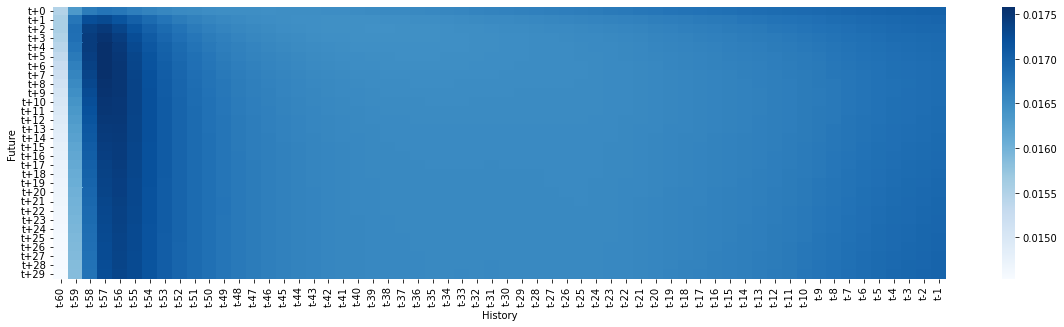

In [ ]:
# Case 2 attention weights
Avg_Weights_AT = Weights_AT.mean(axis=0)
Std_Weights_AT = Weights_AT.std(axis=0)

xlabel = [f't-{x}' for x in range(Len_Hist, 0, -1)]
ylabel = [f't+{x}' for x in range(Len_Futr)]

plt.figure(figsize=(20,5))
ax = sns.heatmap(Avg_Weights_AT, xticklabels=xlabel, yticklabels=ylabel, cmap='Blues')
plt.xlabel('History')
plt.ylabel('Future')


Text(159.0, 0.5, 'Future')

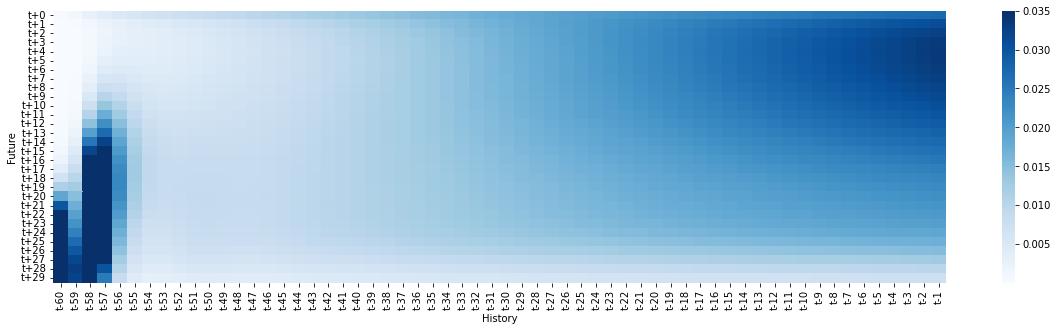

In [ ]:
Avg_Weights_WAT = Weights_WAT.mean(axis=0)
Std_Weights_WAT = Weights_WAT.std(axis=0)

xlabel = [f't-{x}' for x in range(Len_Hist, 0, -1)]
ylabel = [f't+{x}' for x in range(Len_Futr)]

plt.figure(figsize=(20,5))
ax = sns.heatmap(Avg_Weights_WAT, xticklabels=xlabel, yticklabels=ylabel, cmap='Blues', vmax=0.035)
plt.xlabel('History')
plt.ylabel('Future')

# Total plot

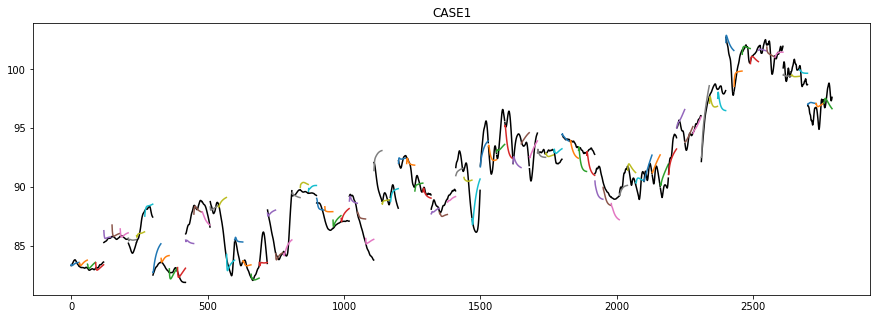

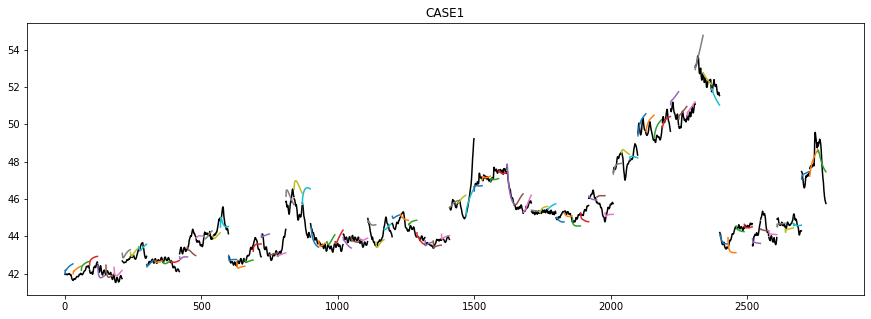

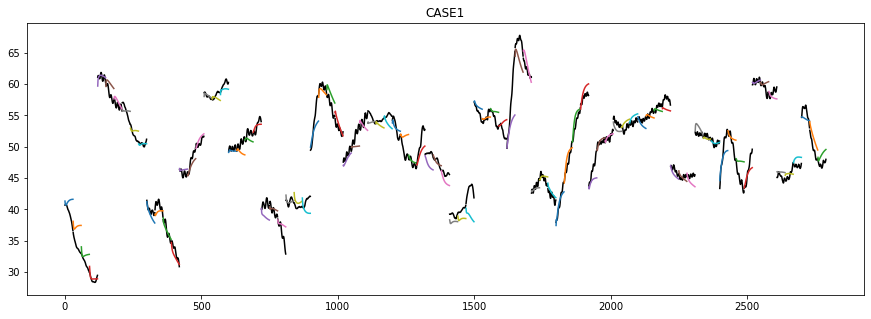

In [ ]:
for var in range(Num_Sens):
    plt.figure(figsize =(15,5))
    plt.title(f'CASE1')
    for i in range(0, len(Futr_Test)-Len_Futr, Len_Futr):
        plt.plot(range(i, i+Len_Futr), Futr_Test[i,:, var], 'k')
        plt.plot(range(i, i+Len_Futr), Predict_DW_sc[i,:, var])
    plt.show()

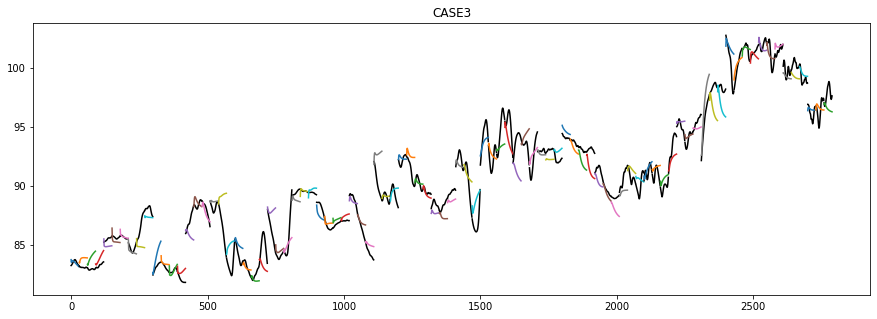

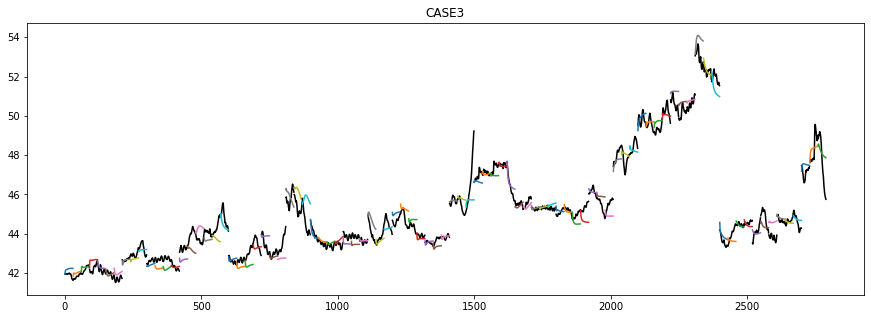

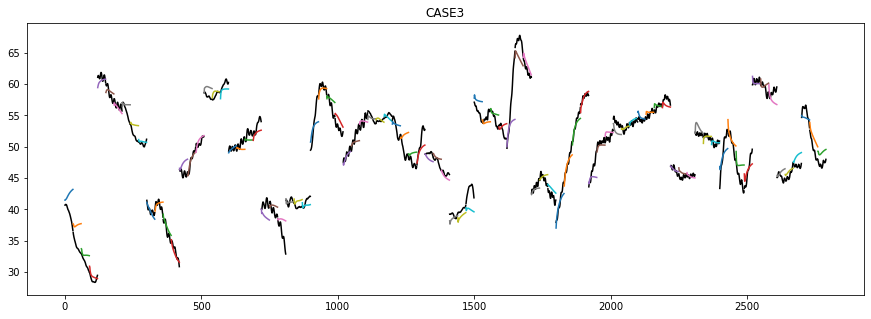

In [ ]:
for var in range(Num_Sens):
    plt.figure(figsize =(15,5))
    plt.title(f'CASE2')
    for i in range(0, len(Futr_Test)-Len_Futr, Len_Futr):
        plt.plot(range(i, i+Len_Futr), Futr_Test[i,:, var], 'k')
        plt.plot(range(i, i+Len_Futr),Predict_AT[i,:, var])
    plt.show()

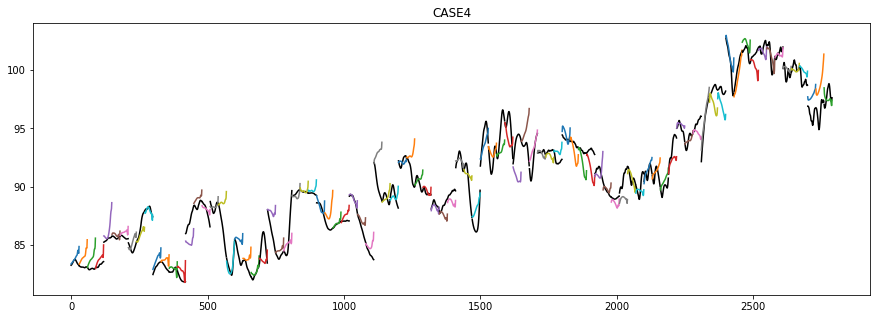

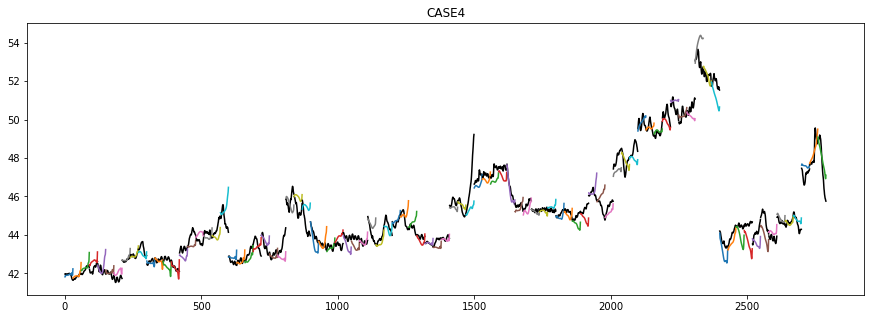

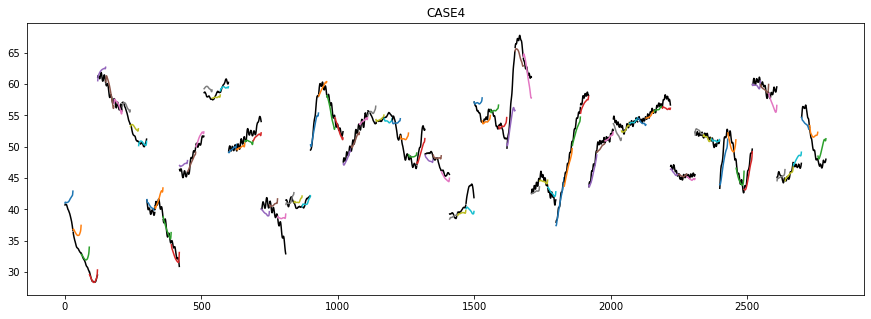

In [ ]:
for var in range(Num_Sens):
    plt.figure(figsize =(15,5))
    plt.title(f'CASE3')
    for i in range(0, len(Futr_Test)-Len_Futr, Len_Futr):
        plt.plot(range(i, i+Len_Futr), Futr_Test[i,:, var], 'k')
        plt.plot(range(i, i+Len_Futr),Predict_WAT[i,:, var])
    plt.show()

#Training iteration

In [98]:
Itr = 5
# Interval = 5

CASE 1

In [99]:
for Model_test_number in range(Itr):

    Name_model_DWGHT = f"{Name_Data_EWA} TS {Test_Ratio_Plant} HISTORY {Len_Hist} FUTURE {Len_Futr} {Num_neurons} {Model_test_number} GRU"

    Update = False
    if not FileExist(Path_Modeling, f"{Name_model_DWGHT}", 'model') or Update:
        time_start = time.time()

        Model_DWGHT = TC_LSTM_rev(Hist_Train_sc,Futr_Train_sc ,1, Num_neurons, True)
        print(Model_DWGHT.summary())
        history = Model_DWGHT.fit(Hist_Train_sc, Futr_Train_sc,
                                epochs = 10000, callbacks=[Early_stopping_cb],
                                verbose = 2, batch_size=Size_batch,
                                validation_data=(Hist_Test_sc, Futr_Test_sc))
        Model_DWGHT.save(f'{Path_Modeling}/{Name_model_DWGHT}')

        time_end = time.time()
        Time_Training = time_end - time_start

        np.set_printoptions(precision=2)
        print(f"{Time_Training} secs were taken")
        CreateFolder(f"{Path_Modeling}/{Name_model_DWGHT}/{Time_Training} secs were taken")

    else:
        Model_DWGHT = LoadFile(Path_Modeling, f'{Name_model_DWGHT}', 'model')

    Predict_DWGHT = Model_DWGHT.predict(Hist_Test_sc)*std_data[-3:] + mean_data[-3:]

    R2_DWGHT_sc = pd.DataFrame(R_Squared(Predict_DWGHT, Futr_Test).mean(axis=1))
    RMSE_DWHGT_sc = pd.DataFrame(nRMSE(Predict_DWGHT, Futr_Test).mean(axis=1))

    R2_RMSE = pd.concat([R2_DWGHT_sc, RMSE_DWHGT_sc], axis=1)

    if Model_test_number == 0:
        Results_DWHGT = R2_RMSE
    
    else:
        Results_DWHGT = pd.concat([Results_DWHGT, R2_RMSE], axis = 1)


Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_41 (InputLayer)       [(None, 60, 7)]           0         
                                                                 
 gru_40 (GRU)                [(None, 200),             125400    
                              (None, 200)]                       
                                                                 
 repeat_vector_20 (RepeatVec  (None, 20, 200)          0         
 tor)                                                            
                                                                 
 gru_41 (GRU)                (None, 20, 200)           241200    
                                                                 
 time_distributed_20 (TimeDi  (None, 20, 3)            603       
 stributed)                                                      
                                                          

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 200 0 GRU/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 200 0 GRU/assets


131.76901388168335 secs were taken
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_43 (InputLayer)       [(None, 60, 7)]           0         
                                                                 
 gru_42 (GRU)                [(None, 200),             125400    
                              (None, 200)]                       
                                                                 
 repeat_vector_21 (RepeatVec  (None, 20, 200)          0         
 tor)                                                            
                                                                 
 gru_43 (GRU)                (None, 20, 200)           241200    
                                                                 
 time_distributed_21 (TimeDi  (None, 20, 3)            603       
 stributed)                                                      
                       

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 200 1 GRU/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 200 1 GRU/assets


134.28566670417786 secs were taken
Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_45 (InputLayer)       [(None, 60, 7)]           0         
                                                                 
 gru_44 (GRU)                [(None, 200),             125400    
                              (None, 200)]                       
                                                                 
 repeat_vector_22 (RepeatVec  (None, 20, 200)          0         
 tor)                                                            
                                                                 
 gru_45 (GRU)                (None, 20, 200)           241200    
                                                                 
 time_distributed_22 (TimeDi  (None, 20, 3)            603       
 stributed)                                                      
                       

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 200 2 GRU/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 200 2 GRU/assets


134.17610716819763 secs were taken
Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_47 (InputLayer)       [(None, 60, 7)]           0         
                                                                 
 gru_46 (GRU)                [(None, 200),             125400    
                              (None, 200)]                       
                                                                 
 repeat_vector_23 (RepeatVec  (None, 20, 200)          0         
 tor)                                                            
                                                                 
 gru_47 (GRU)                (None, 20, 200)           241200    
                                                                 
 time_distributed_23 (TimeDi  (None, 20, 3)            603       
 stributed)                                                      
                       

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 200 3 GRU/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 200 3 GRU/assets


156.1228530406952 secs were taken
Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_49 (InputLayer)       [(None, 60, 7)]           0         
                                                                 
 gru_48 (GRU)                [(None, 200),             125400    
                              (None, 200)]                       
                                                                 
 repeat_vector_24 (RepeatVec  (None, 20, 200)          0         
 tor)                                                            
                                                                 
 gru_49 (GRU)                (None, 20, 200)           241200    
                                                                 
 time_distributed_24 (TimeDi  (None, 20, 3)            603       
 stributed)                                                      
                        

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 200 4 GRU/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 200 4 GRU/assets


129.13291668891907 secs were taken


In [100]:
Results_DWHGT

,0,0,0,0,0,0,0,0,0,0
0,0.995219,0.456718,0.994014,0.496980,0.995731,0.452028,0.995642,0.436733,0.992881,0.539225
1,0.993410,0.528727,0.993292,0.541201,0.994431,0.507294,0.995170,0.467299,0.992268,0.557518
2,0.991940,0.585361,0.991769,0.602433,0.992592,0.581793,0.993530,0.537952,0.990542,0.617315
3,0.989709,0.659708,0.989858,0.669469,0.990180,0.667044,0.991226,0.625342,0.988339,0.687430
4,0.986995,0.740050,0.987581,0.740159,0.987530,0.749025,0.988615,0.710893,0.985791,0.759407
5,0.984018,0.817705,0.985052,0.809757,0.984776,0.824025,0.985856,0.789615,0.983078,0.827242
6,0.980819,0.892004,0.982281,0.877956,0.981922,0.893536,0.982966,0.862757,0.980217,0.891621
7,0.977379,0.965055,0.979239,0.946486,0.978932,0.960244,0.979893,0.933704,0.977152,0.955744
8,0.973670,1.039149,0.975896,1.017149,0.975761,1.026718,0.976580,1.005446,0.973818,1.022624
9,0.969702,1.114794,0.972259,1.090204,0.972395,1.094078,0.973007,1.079081,0.970194,1.093156


CASE 3

In [ ]:
for Model_test_number in range(Itr):

    Name_model_DWAT = f"{Name_Data_EWA} TS {Test_Ratio_Plant} HISTORY {Len_Hist} FUTURE {Len_Futr} {Num_neurons}, ITR {Model_test_number} ATT"

    Update = False
    if not FileExist(Path_Modeling, f"{Name_model_DWAT}", 'model') or Update:
        time_start = time.time()

        Model_DWAT = ATT_TC_LSTM(Hist_Train_sc, Futr_Train_sc, 1 ,Num_neurons)
        print(Model_DWAT.summary())
        history = Model_DWAT.fit(Hist_Train_sc, Futr_Train_sc,
                                epochs = 10000, callbacks=[Early_stopping_cb],
                                verbose = 2, batch_size=Size_batch,
                                validation_data=(Hist_Test_sc, Futr_Test_sc))
        Model_DWAT.save(f'{Path_Modeling}/{Name_model_DWAT}')

        time_end = time.time()
        Time_Training = time_end - time_start

        np.set_printoptions(precision=2)
        print(f"{Time_Training} secs were taken")
        CreateFolder(f"{Path_Modeling}/{Name_model_DWAT}/{Time_Training} secs were taken")

    else:
        Model_DWAT = LoadFile(Path_Modeling, f'{Name_model_DWAT}', 'model')

    Std_Sens = np.tile(Std_Proc[-3:], (Futr_Test_sc.shape[1],1))
    Mean_Sens = np.tile(Mean_Proc[-3:], (Futr_Test_sc.shape[1],1))

    Predict_DWAT = Model_DWAT.predict(Hist_Test_sc)*Std_Sens+Mean_Sens

    R2_DWAT_sc = pd.DataFrame(R_Squared(Predict_DWAT, Futr_Test).mean(axis=1))
    RMSE_DWAT_sc = pd.DataFrame(nRMSE(Predict_DWAT, Futr_Test).mean(axis=1))

    R2_RMSE = pd.concat([R2_DWAT_sc, RMSE_DWAT_sc], axis=1)

    if Model_test_number == 5:
        Results_DWAT = R2_RMSE
    
    else:
        Results_DWAT = pd.concat([Results_DWAT, R2_RMSE], axis = 1)


Model: "model_32"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_65 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_64 (GRU)                   [(None, 60, 200),    125400      ['input_65[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_32 (RepeatVector  (None, 20, 200)     0           ['gru_64[0][1]']                 
 )                                                                                                
                                                                                           

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 5 ATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 5 ATT/assets


136.65510487556458 secs were taken
Model: "model_33"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_67 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_66 (GRU)                   [(None, 60, 200),    125400      ['input_67[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_33 (RepeatVector  (None, 20, 200)     0           ['gru_66[0][1]']                 
 )                                                                                                
                                                        

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 6 ATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 6 ATT/assets


132.47676014900208 secs were taken
Model: "model_34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_69 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_68 (GRU)                   [(None, 60, 200),    125400      ['input_69[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_34 (RepeatVector  (None, 20, 200)     0           ['gru_68[0][1]']                 
 )                                                                                                
                                                        

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 7 ATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 7 ATT/assets


131.76952934265137 secs were taken
Model: "model_35"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_71 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_70 (GRU)                   [(None, 60, 200),    125400      ['input_71[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_35 (RepeatVector  (None, 20, 200)     0           ['gru_70[0][1]']                 
 )                                                                                                
                                                        

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 8 ATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 8 ATT/assets


131.48451685905457 secs were taken
Model: "model_36"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_73 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_72 (GRU)                   [(None, 60, 200),    125400      ['input_73[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_36 (RepeatVector  (None, 20, 200)     0           ['gru_72[0][1]']                 
 )                                                                                                
                                                        

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 9 ATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 9 ATT/assets


155.96022295951843 secs were taken
Model: "model_37"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_75 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_74 (GRU)                   [(None, 60, 200),    125400      ['input_75[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_37 (RepeatVector  (None, 20, 200)     0           ['gru_74[0][1]']                 
 )                                                                                                
                                                        

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 10 ATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 10 ATT/assets


131.88588428497314 secs were taken
Model: "model_38"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_77 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_76 (GRU)                   [(None, 60, 200),    125400      ['input_77[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_38 (RepeatVector  (None, 20, 200)     0           ['gru_76[0][1]']                 
 )                                                                                                
                                                        

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 11 ATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 11 ATT/assets


155.5039291381836 secs were taken
Model: "model_39"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_79 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_78 (GRU)                   [(None, 60, 200),    125400      ['input_79[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_39 (RepeatVector  (None, 20, 200)     0           ['gru_78[0][1]']                 
 )                                                                                                
                                                         

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 12 ATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 12 ATT/assets


138.4425823688507 secs were taken
Model: "model_40"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_81 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_80 (GRU)                   [(None, 60, 200),    125400      ['input_81[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_40 (RepeatVector  (None, 20, 200)     0           ['gru_80[0][1]']                 
 )                                                                                                
                                                         

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 13 ATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 13 ATT/assets


136.04300117492676 secs were taken
Model: "model_41"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_83 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_82 (GRU)                   [(None, 60, 200),    125400      ['input_83[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_41 (RepeatVector  (None, 20, 200)     0           ['gru_82[0][1]']                 
 )                                                                                                
                                                        

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 14 ATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 14 ATT/assets


155.7180140018463 secs were taken
Model: "model_42"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_85 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_84 (GRU)                   [(None, 60, 200),    125400      ['input_85[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_42 (RepeatVector  (None, 20, 200)     0           ['gru_84[0][1]']                 
 )                                                                                                
                                                         

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 15 ATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 15 ATT/assets


126.53376936912537 secs were taken
Model: "model_43"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_87 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_86 (GRU)                   [(None, 60, 200),    125400      ['input_87[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_43 (RepeatVector  (None, 20, 200)     0           ['gru_86[0][1]']                 
 )                                                                                                
                                                        

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 16 ATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 16 ATT/assets


129.31824159622192 secs were taken
Model: "model_44"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_89 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_88 (GRU)                   [(None, 60, 200),    125400      ['input_89[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_44 (RepeatVector  (None, 20, 200)     0           ['gru_88[0][1]']                 
 )                                                                                                
                                                        

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 17 ATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 17 ATT/assets


155.51040077209473 secs were taken
Model: "model_45"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_91 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_90 (GRU)                   [(None, 60, 200),    125400      ['input_91[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_45 (RepeatVector  (None, 20, 200)     0           ['gru_90[0][1]']                 
 )                                                                                                
                                                        

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 18 ATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 18 ATT/assets


133.9947578907013 secs were taken
Model: "model_46"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_93 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_92 (GRU)                   [(None, 60, 200),    125400      ['input_93[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_46 (RepeatVector  (None, 20, 200)     0           ['gru_92[0][1]']                 
 )                                                                                                
                                                         

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 19 ATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20 1, 200 TC GRU 19 ATT/assets


155.73414659500122 secs were taken


In [ ]:
Results_DWAT

,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.993976,0.520579,0.993604,0.525716,0.993078,0.544023,0.993233,0.541144,0.993201,0.526333,0.993087,0.560001,0.991255,0.604099,0.993121,0.544714,0.992881,0.540676,0.992827,0.556896,0.989656,0.676162,0.991255,0.610371,0.994568,0.488642,0.993977,0.519434,0.992281,0.585264
1,0.992993,0.561471,0.992722,0.574218,0.992556,0.574974,0.992679,0.571960,0.991872,0.583242,0.992533,0.581997,0.991527,0.603018,0.991785,0.600970,0.991562,0.590367,0.992347,0.579459,0.990579,0.650053,0.991025,0.621716,0.993733,0.527468,0.993100,0.556411,0.991473,0.624392
2,0.991547,0.612761,0.991039,0.629208,0.991160,0.625199,0.991119,0.623567,0.990304,0.633439,0.990979,0.633064,0.989846,0.657130,0.990170,0.652761,0.990142,0.639574,0.990418,0.639495,0.989213,0.688955,0.989408,0.666361,0.992153,0.583988,0.991631,0.608078,0.990415,0.655036
3,0.989313,0.684774,0.988828,0.694599,0.989032,0.692984,0.988953,0.690739,0.988254,0.696275,0.988916,0.697310,0.987517,0.727011,0.988026,0.717477,0.988095,0.705928,0.987770,0.716302,0.986988,0.751639,0.987268,0.725549,0.990090,0.652100,0.989485,0.678559,0.988456,0.712449
4,0.986686,0.758969,0.986292,0.760805,0.986457,0.764469,0.986422,0.760436,0.985836,0.761671,0.986482,0.764877,0.984835,0.799772,0.985646,0.782008,0.985705,0.774500,0.984862,0.790748,0.984483,0.816439,0.984786,0.788246,0.987725,0.721496,0.987073,0.748709,0.986079,0.775839
5,0.983758,0.831868,0.983485,0.825421,0.983542,0.834906,0.983662,0.827388,0.983135,0.825802,0.983793,0.830546,0.981953,0.869435,0.983081,0.843796,0.983099,0.840386,0.981825,0.860406,0.981880,0.877407,0.982058,0.850240,0.985122,0.788368,0.984488,0.815391,0.983402,0.840207
6,0.980552,0.903280,0.980396,0.889114,0.980299,0.904296,0.980693,0.891788,0.980152,0.888798,0.980844,0.894711,0.978909,0.935616,0.980311,0.903512,0.980294,0.903768,0.978686,0.926064,0.979183,0.934709,0.979085,0.911831,0.982253,0.853549,0.981726,0.879259,0.980459,0.904450
7,0.977078,0.974393,0.976997,0.953837,0.976716,0.974246,0.977496,0.955826,0.976867,0.952616,0.977599,0.959531,0.975687,1.000262,0.977282,0.963525,0.977254,0.966819,0.975410,0.990457,0.976338,0.990631,0.975839,0.975063,0.979072,0.919342,0.978737,0.942692,0.977233,0.969827
8,0.973360,1.046316,0.973290,1.021255,0.972802,1.046229,0.974050,1.021691,0.973270,1.019110,0.974022,1.027130,0.972257,1.065564,0.973940,1.026311,0.973938,1.031746,0.971952,1.056026,0.973288,1.047600,0.972307,1.041539,0.975540,0.987973,0.975462,1.008104,0.973717,1.037626
9,0.969448,1.118953,0.969316,1.091441,0.968605,1.120255,0.970365,1.089989,0.969403,1.088359,0.970116,1.098006,0.968615,1.132318,0.970275,1.092729,0.970331,1.099286,0.968301,1.123588,0.970018,1.106650,0.968515,1.111151,0.971653,1.060110,0.971870,1.076454,0.969937,1.107795


CASE 4

In [88]:
Itr = 5

for Model_test_number in range(Itr):

    Name_model_WAT = f"{Name_Data_EWA} TS {Test_Ratio_Plant} HISTORY {Len_Hist} FUTURE {Len_Futr}, DELTA {Delta} {Num_neurons}, {Model_test_number} WATT"

    Update = False
    if not FileExist(Path_Modeling, f"{Name_model_WAT}", 'model') or Update:
        time_start = time.time()

        Model_WAT = ATT_TC_LSTM(Hist_Train_wght_sc, Futr_Train_wght_sc, 1 ,Num_neurons, True)
        print(Model_WAT.summary())
        history = Model_WAT.fit(Hist_Train_wght_sc, Futr_Train_wght_sc,
                                epochs = 10000, callbacks=[Early_stopping_cb],
                                verbose = 2, batch_size=Size_batch,
                                validation_data=(Hist_Test_wght_sc, Futr_Test_wght_sc))
        Model_WAT.save(f'{Path_Modeling}/{Name_model_WAT}')

        time_end = time.time()
        Time_Training = time_end - time_start

        np.set_printoptions(precision=2)
        print(f"{Time_Training} secs were taken")
        CreateFolder(f"{Path_Modeling}/{Name_model_WAT}/{Time_Training} secs were taken")

    else:
        Model_WAT = LoadFile(Path_Modeling, f'{Name_model_WAT}', 'model')

    # Model_WAT = Model(inputs=Model_WAT.input, outputs=[Model_WAT.output, Model_WAT.get_layer('attention_vec').output])

    Std_Sens = np.tile(Std_Proc[-3:], (Futr_Test_sc.shape[1],1))
    Mean_Sens = np.tile(Mean_Proc[-3:], (Futr_Test_sc.shape[1],1))

    Predict_WAT = Model_WAT.predict(Hist_Test_wght_sc)*Std_Proc_wght[-3:] + Mean_Proc_wght[-3:]

    R2_WAT_sc = pd.DataFrame(R_Squared(Predict_WAT/factor, Futr_Test).mean(axis=1))
    RMSE_WAT_sc = pd.DataFrame(nRMSE(Predict_WAT/factor, Futr_Test).mean(axis=1))

    R2_RMSE = pd.concat([R2_WAT_sc, RMSE_WAT_sc], axis=1)

    if Model_test_number == 0:
        Results_WAT = R2_RMSE
    
    else:
        Results_WAT = pd.concat([Results_WAT, R2_RMSE], axis = 1)


Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_20 (GRU)                   [(None, 60, 200),    125400      ['input_21[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_10 (RepeatVector  (None, 20, 200)     0           ['gru_20[0][1]']                 
 )                                                                                                
                                                                                           

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20, DELTA 0.5 200, 0 WATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20, DELTA 0.5 200, 0 WATT/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


277.4107577800751 secs were taken
Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_23 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_22 (GRU)                   [(None, 60, 200),    125400      ['input_23[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_11 (RepeatVector  (None, 20, 200)     0           ['gru_22[0][1]']                 
 )                                                                                                
                                                         

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20, DELTA 0.5 200, 1 WATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20, DELTA 0.5 200, 1 WATT/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


231.40124940872192 secs were taken
Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_25 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_24 (GRU)                   [(None, 60, 200),    125400      ['input_25[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_12 (RepeatVector  (None, 20, 200)     0           ['gru_24[0][1]']                 
 )                                                                                                
                                                        

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20, DELTA 0.5 200, 2 WATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20, DELTA 0.5 200, 2 WATT/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


194.47701859474182 secs were taken
Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_27 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_26 (GRU)                   [(None, 60, 200),    125400      ['input_27[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_13 (RepeatVector  (None, 20, 200)     0           ['gru_26[0][1]']                 
 )                                                                                                
                                                        

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20, DELTA 0.5 200, 3 WATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20, DELTA 0.5 200, 3 WATT/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


216.76149106025696 secs were taken
Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_29 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_28 (GRU)                   [(None, 60, 200),    125400      ['input_29[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_14 (RepeatVector  (None, 20, 200)     0           ['gru_28[0][1]']                 
 )                                                                                                
                                                        

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20, DELTA 0.5 200, 4 WATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20, DELTA 0.5 200, 4 WATT/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


217.23264575004578 secs were taken


In [89]:
Results_WAT

,0,0,0,0,0,0,0,0,0,0
0,0.993005,0.559562,0.993636,0.552231,0.995120,0.461953,0.994824,0.490949,0.993989,0.522629
1,0.993535,0.536896,0.993971,0.517832,0.994494,0.485911,0.995120,0.468315,0.994652,0.491495
2,0.992217,0.584254,0.992700,0.564742,0.992669,0.559872,0.993765,0.529804,0.993230,0.549516
3,0.990008,0.655868,0.990657,0.639836,0.990416,0.640552,0.991743,0.610063,0.991163,0.624888
4,0.987449,0.727839,0.988190,0.717415,0.987860,0.718630,0.989451,0.686935,0.988731,0.701669
5,0.984677,0.794917,0.985479,0.789275,0.985071,0.791900,0.986981,0.757083,0.986119,0.772575
6,0.981638,0.858884,0.982617,0.854492,0.982102,0.860513,0.984329,0.822153,0.983299,0.839556
7,0.978292,0.922472,0.979539,0.917357,0.978942,0.927103,0.981471,0.885200,0.980213,0.906137
8,0.974685,0.987474,0.976115,0.982748,0.975532,0.994955,0.978382,0.949234,0.976875,0.974390
9,0.970902,1.054207,0.972312,1.052312,0.971853,1.065326,0.975041,1.015776,0.973344,1.044477


#PLOT

In [ ]:

def HistorySteps(length):
    return list(range(-length, 0))

def PlotSSSO(num_plot, list_vars, history, future, length, predictions=False):    
    num_in = HistorySteps(history.shape[1])
    num_out = range(length)

    for var in list_vars:
        plt.figure(figsize=(10, 5))
        history_plot = history[num_plot, :, var + (history.shape[2]-future.shape[2])]
        future_plot = future[num_plot, :length, var]
        

        plt.plot(num_in, np.array(history_plot), label='History', c='b')
        plt.plot(num_out, np.array(future_plot), 'b--', marker='o',
            label='True Future')
        
        if predictions:
            for i,(c,name) in enumerate(zip(['r--', 'g--'], ["SSMO", "ENCO"])):
                predictions_plot = predictions[i][num_plot, :length, var]
                plt.plot(num_out, np.array(predictions_plot), c, marker='x',
                        label=name)
                
        # plt.title(f'{VAR_future[var]}')
        plt.legend(loc='upper left')
        plt.show()

def PlotMSMO(num_plot, len_hist, len_fut, future, predictions=False, labels=False, colors=False):
    num_in = HistorySteps(len_hist)
    num_out = range(len_fut)
    plt.figure(figsize=(10*future.shape[2], 5))

    for i in range(future.shape[2]):
        plt.subplot(1, future.shape[2], i+1)
        history_plot = future[num_plot - len_hist:num_plot, 0, i]
        future_plot = future[num_plot, :len_fut, i]

        plt.plot(num_in, np.array(history_plot), 'k', label='History')
        plt.plot(num_out, np.array(future_plot), 'k--', label='Actual values', linewidth=1.5)

        if predictions:
            for prediction, label, color in zip(predictions, labels, colors):
                prediction_plot = prediction[num_plot, :len_fut, i]
                plt.plot(num_out, np.array(prediction_plot), f'{color}--', marker='x', label=label, linewidth=1.5)

        # plt.title(f'{Var_Sens[i]}', Font_Title)
        plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

In [ ]:

# ERROR_SSMO = np.sum( np.abs( Future_test - Predict_SSMO ) , axis=1)
# mean = Mean_Proc[Var_Sens].values
# std = Std_Proc[Var_Sens].values
# Futr_Test = Futr_Test_sc*std + mean
# # Predict_DNNs = Predict_DNNs_sc*std + mean
# Predict_AELSTMs = Predict_AELSTMs_sc*std + mean
# # Predict_GRUs = Predict_GRUs_sc*std + mean
# # Predict_TCLSTM = Predict_TCLSTM_sc*std + mean
# Predict_TCGRU = Predict_TCGRU_sc*std + mean

# ERROR_AELSTMs = np.sum( np.abs( Futr_Test_sc - Predict_AELSTMs_sc ) , axis=1)
# ERROR_GRUs = np.sum( np.abs( Futr_Test_sc - Predict_GRUs ) , axis=1)
# ERROR_TCLSTM = np.sum( np.abs( Futr_Test_sc - Predict_TCLSTM_sc ) , axis=1)
ERROR_WGHT = np.sum( np.abs( Futr_Test_sc - Predict_WGHT_sc ) , axis=1)


ERROR_SUM = np.sum( ERROR_WGHT**2, axis=1 )

In [ ]:

num_var=0
for num in np.argsort(ERROR_WGHT[:,num_var], axis=0)[:10]:
    PlotMSMO(num, Len_Hist, Len_Futr, Futr_Test_sc[:,:,[num_var]], [Predict_DWGHT_sc[:,:,[num_var]], Predict_WGHT_sc[:,:,[num_var]]], ["ORIGINAL", "WEIGHTED Y"], ['r', 'b'])

# DATA PREPARATION

## 시리즈 데이터 생성

In [101]:
Step = 1
Len_Hist = 60
Len_Futr = 20

In [102]:
Hist_Proc, Futr_Sens = MakeSeries(Data_Plant_On_EWA, Len_Hist, Len_Futr, Step)

print ("(the Number of Dataset, Length of History, Features of History)",
    f"Total History: {Hist_Proc.shape}",
    f"Total Future: {Futr_Sens.shape}",
    sep='\n')

(the Number of Dataset, Length of History, Features of History)
Total History: (13834, 60, 7)
Total Future: (13834, 20, 3)


## Train/Test split

In [103]:
# by random
Test_Ratio_Plant = 0.2

Hist_Train, Hist_Test = EvenTTSplit(Hist_Proc, Test_Ratio_Plant)
Futr_Train, Futr_Test = EvenTTSplit(Futr_Sens, Test_Ratio_Plant)

print ("(the Number of Dataset, Length of History, Features of History)",
    f"History Train: {Hist_Train.shape}",
    f"Future Train: {Futr_Train.shape}",
    f"History Test: {Hist_Test.shape}",
    f"Future Test: {Futr_Test.shape}",
    sep='\n')

(the Number of Dataset, Length of History, Features of History)
History Train: (11000, 60, 7)
Future Train: (11000, 20, 3)
History Test: (2800, 60, 7)
Future Test: (2800, 20, 3)


## 데이터 가중치

In [104]:
# # factor = np.array([np.arange(10,0.75,-1)*(i+1)/(i+1) for i in range(3)]).T
Delta = 3
factor = FactorCalculate(Delta, Len_Futr, Num_Sens, 'linear')

Futr_Train_wght = Futr_Train * factor
Futr_Test_wght = Futr_Test * factor

factor

array([[4.  , 4.  , 4.  ],
       [3.84, 3.84, 3.84],
       [3.68, 3.68, 3.68],
       [3.53, 3.53, 3.53],
       [3.37, 3.37, 3.37],
       [3.21, 3.21, 3.21],
       [3.05, 3.05, 3.05],
       [2.89, 2.89, 2.89],
       [2.74, 2.74, 2.74],
       [2.58, 2.58, 2.58],
       [2.42, 2.42, 2.42],
       [2.26, 2.26, 2.26],
       [2.11, 2.11, 2.11],
       [1.95, 1.95, 1.95],
       [1.79, 1.79, 1.79],
       [1.63, 1.63, 1.63],
       [1.47, 1.47, 1.47],
       [1.32, 1.32, 1.32],
       [1.16, 1.16, 1.16],
       [1.  , 1.  , 1.  ]])

## Scaling

원본 데이터 스케일링

In [105]:
data_target = Hist_Train

mean_data = data_target.mean(axis=0).mean(axis=0)
std_data = data_target[:,0,:].std(axis=0)

Mean_Proc = mean_data
Std_Proc = std_data

print(f"MEAN:\n{Mean_Proc}")
print()
print(f"STD:\n{Std_Proc}")

Hist_Train_sc = (Hist_Train - Mean_Proc)/Std_Proc
Hist_Test_sc = (Hist_Test - Mean_Proc)/Std_Proc

Futr_Train_sc = (Futr_Train - Mean_Proc[-3:])/Std_Proc[-3:]
Futr_Test_sc = (Futr_Test - Mean_Proc[-3:])/Std_Proc[-3:]

MEAN:
[ 74.06 124.11  47.36  45.16  90.73  45.3   49.24]

STD:
[9.16 7.06 5.15 7.17 4.98 2.91 7.44]


가중치 데이터 스케일링

In [106]:
data_target = Hist_Train

mean_mani = data_target[:,0,:Num_Mani].mean(axis=0)
std_mani = data_target[:,0,:Num_Mani].std(axis=0)

mean_sens = Futr_Train_wght.mean(axis=0).mean(axis=0)
std_sens = Futr_Train_wght[:,0,:].std(axis=0)

Mean_Proc_wght = np.concatenate([mean_mani,mean_sens])
Std_Proc_wght = np.concatenate([std_mani, std_sens ])

print(f"MEAN:\n{Mean_Proc_wght}")
print()
print(f"STD:\n{Std_Proc_wght}")

Hist_Train_wght_sc = (Hist_Train - Mean_Proc_wght)/Std_Proc_wght
Hist_Test_wght_sc = (Hist_Test - Mean_Proc_wght)/Std_Proc_wght

Futr_Train_wght_sc = (Futr_Train_wght - Mean_Proc_wght[-3:])/Std_Proc_wght[-3:]
Futr_Test_wght_sc = (Futr_Test_wght - Mean_Proc_wght[-3:])/Std_Proc_wght[-3:]

MEAN:
[ 74.15 124.06  47.31  45.2  226.7  113.11 123.62]

STD:
[ 9.16  7.06  5.15  7.17 19.95  9.86 29.84]


In [107]:
Itr = 5

for Model_test_number in range(Itr):

    Name_model_WAT = f"{Name_Data_EWA} TS {Test_Ratio_Plant} HISTORY {Len_Hist} FUTURE {Len_Futr}, DELTA {Delta} {Num_neurons}, {Model_test_number} WATT"

    Update = False
    if not FileExist(Path_Modeling, f"{Name_model_WAT}", 'model') or Update:
        time_start = time.time()

        Model_WAT = ATT_TC_LSTM(Hist_Train_wght_sc, Futr_Train_wght_sc, 1 ,Num_neurons, True)
        print(Model_WAT.summary())
        history = Model_WAT.fit(Hist_Train_wght_sc, Futr_Train_wght_sc,
                                epochs = 10000, callbacks=[Early_stopping_cb],
                                verbose = 2, batch_size=Size_batch,
                                validation_data=(Hist_Test_wght_sc, Futr_Test_wght_sc))
        Model_WAT.save(f'{Path_Modeling}/{Name_model_WAT}')

        time_end = time.time()
        Time_Training = time_end - time_start

        np.set_printoptions(precision=2)
        print(f"{Time_Training} secs were taken")
        CreateFolder(f"{Path_Modeling}/{Name_model_WAT}/{Time_Training} secs were taken")

    else:
        Model_WAT = LoadFile(Path_Modeling, f'{Name_model_WAT}', 'model')

    # Model_WAT = Model(inputs=Model_WAT.input, outputs=[Model_WAT.output, Model_WAT.get_layer('attention_vec').output])

    Std_Sens = np.tile(Std_Proc[-3:], (Futr_Test_sc.shape[1],1))
    Mean_Sens = np.tile(Mean_Proc[-3:], (Futr_Test_sc.shape[1],1))

    Predict_WAT = Model_WAT.predict(Hist_Test_wght_sc)*Std_Proc_wght[-3:] + Mean_Proc_wght[-3:]

    R2_WAT_sc = pd.DataFrame(R_Squared(Predict_WAT/factor, Futr_Test).mean(axis=1))
    RMSE_WAT_sc = pd.DataFrame(nRMSE(Predict_WAT/factor, Futr_Test).mean(axis=1))

    R2_RMSE = pd.concat([R2_WAT_sc, RMSE_WAT_sc], axis=1)

    if Model_test_number == 0:
        Results_WAT = R2_RMSE
    
    else:
        Results_WAT = pd.concat([Results_WAT, R2_RMSE], axis = 1)


Model: "model_25"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_51 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_50 (GRU)                   [(None, 60, 200),    125400      ['input_51[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_25 (RepeatVector  (None, 20, 200)     0           ['gru_50[0][1]']                 
 )                                                                                                
                                                                                           

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20, DELTA 3 200, 0 WATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20, DELTA 3 200, 0 WATT/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


396.80774664878845 secs were taken
Model: "model_26"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_53 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_52 (GRU)                   [(None, 60, 200),    125400      ['input_53[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_26 (RepeatVector  (None, 20, 200)     0           ['gru_52[0][1]']                 
 )                                                                                                
                                                        

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20, DELTA 3 200, 1 WATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20, DELTA 3 200, 1 WATT/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


396.4152846336365 secs were taken
Model: "model_27"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_55 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_54 (GRU)                   [(None, 60, 200),    125400      ['input_55[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_27 (RepeatVector  (None, 20, 200)     0           ['gru_54[0][1]']                 
 )                                                                                                
                                                         

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20, DELTA 3 200, 2 WATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20, DELTA 3 200, 2 WATT/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


456.2169873714447 secs were taken
Model: "model_28"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_57 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_56 (GRU)                   [(None, 60, 200),    125400      ['input_57[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_28 (RepeatVector  (None, 20, 200)     0           ['gru_56[0][1]']                 
 )                                                                                                
                                                         

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20, DELTA 3 200, 3 WATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20, DELTA 3 200, 3 WATT/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


455.9851043224335 secs were taken
Model: "model_29"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_59 (InputLayer)          [(None, 60, 7)]      0           []                               
                                                                                                  
 gru_58 (GRU)                   [(None, 60, 200),    125400      ['input_59[0][0]']               
                                 (None, 200)]                                                     
                                                                                                  
 repeat_vector_29 (RepeatVector  (None, 20, 200)     0           ['gru_58[0][1]']                 
 )                                                                                                
                                                         

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20, DELTA 3 200, 4 WATT/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/DC/Modeling/BDO Data Operation October RS 10 Cluster 2 Series 500 EWA 0.9 TS 0.2 HISTORY 60 FUTURE 20, DELTA 3 200, 4 WATT/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


516.5669581890106 secs were taken


In [108]:
Results_WAT

,0,0,0,0,0,0,0,0,0,0
0,0.994681,0.479878,0.995291,0.453922,0.996110,0.414538,0.995618,0.428752,0.995630,0.438176
1,0.993286,0.535986,0.994501,0.490738,0.995487,0.444220,0.994166,0.496537,0.994257,0.489658
2,0.991388,0.606237,0.992728,0.564442,0.993737,0.523662,0.992342,0.570305,0.992452,0.567431
3,0.989068,0.684469,0.990545,0.644027,0.991533,0.610676,0.990012,0.654569,0.990158,0.647967
4,0.986511,0.758863,0.988153,0.718829,0.989021,0.694257,0.987705,0.724294,0.987819,0.724604
5,0.983827,0.824947,0.985528,0.790243,0.986253,0.771761,0.985311,0.787759,0.985515,0.790369
6,0.980985,0.885684,0.982715,0.858252,0.983258,0.844548,0.982797,0.847062,0.982951,0.854822
7,0.977926,0.945517,0.979638,0.926459,0.980013,0.914914,0.980006,0.907019,0.980230,0.917521
8,0.974621,1.007325,0.976192,1.000032,0.976441,0.986176,0.976896,0.970036,0.977277,0.978841
9,0.971090,1.071696,0.972448,1.079146,0.972481,1.063578,0.973517,1.036120,0.974000,1.046156
